In [1]:
#K-Means Clustering
from scipy.stats import zscore

In [2]:
from pyforest import*
lazy_imports()

['import statsmodels.api as sm',
 'import altair as alt',
 'from sklearn.cluster import KMeans',
 'from openpyxl import load_workbook',
 'import seaborn as sns',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.impute import SimpleImputer',
 'import nltk',
 'import glob',
 'from sklearn.model_selection import GridSearchCV',
 'import pandas as pd',
 'import skimage',
 'import sys',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.model_selection import StratifiedKFold',
 'import os',
 'from sklearn.linear_model import Ridge',
 'from sklearn.linear_model import ElasticNetCV',
 'from pyspark import SparkContext',
 'import torch',
 'from sklearn import metrics',
 'from sklearn.model_selection import KFold',
 'from sklearn.decomposition import PCA',
 'from xlrd import open_workbook',
 'import spacy',
 'from pathlib import Path',
 'from sklearn.model_selection import train_test_split',
 'from sklearn import svm',
 'from sklearn.ensemble import Grad

In [3]:
data = pd.read_csv('Dataset.csv')
data.head(10)

<IPython.core.display.Javascript object>

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [4]:
data.shape

(23, 8)

In [5]:
attr=data.iloc[:,1:]
scaled = attr.apply(zscore)

In [6]:
scaled

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


<IPython.core.display.Javascript object>

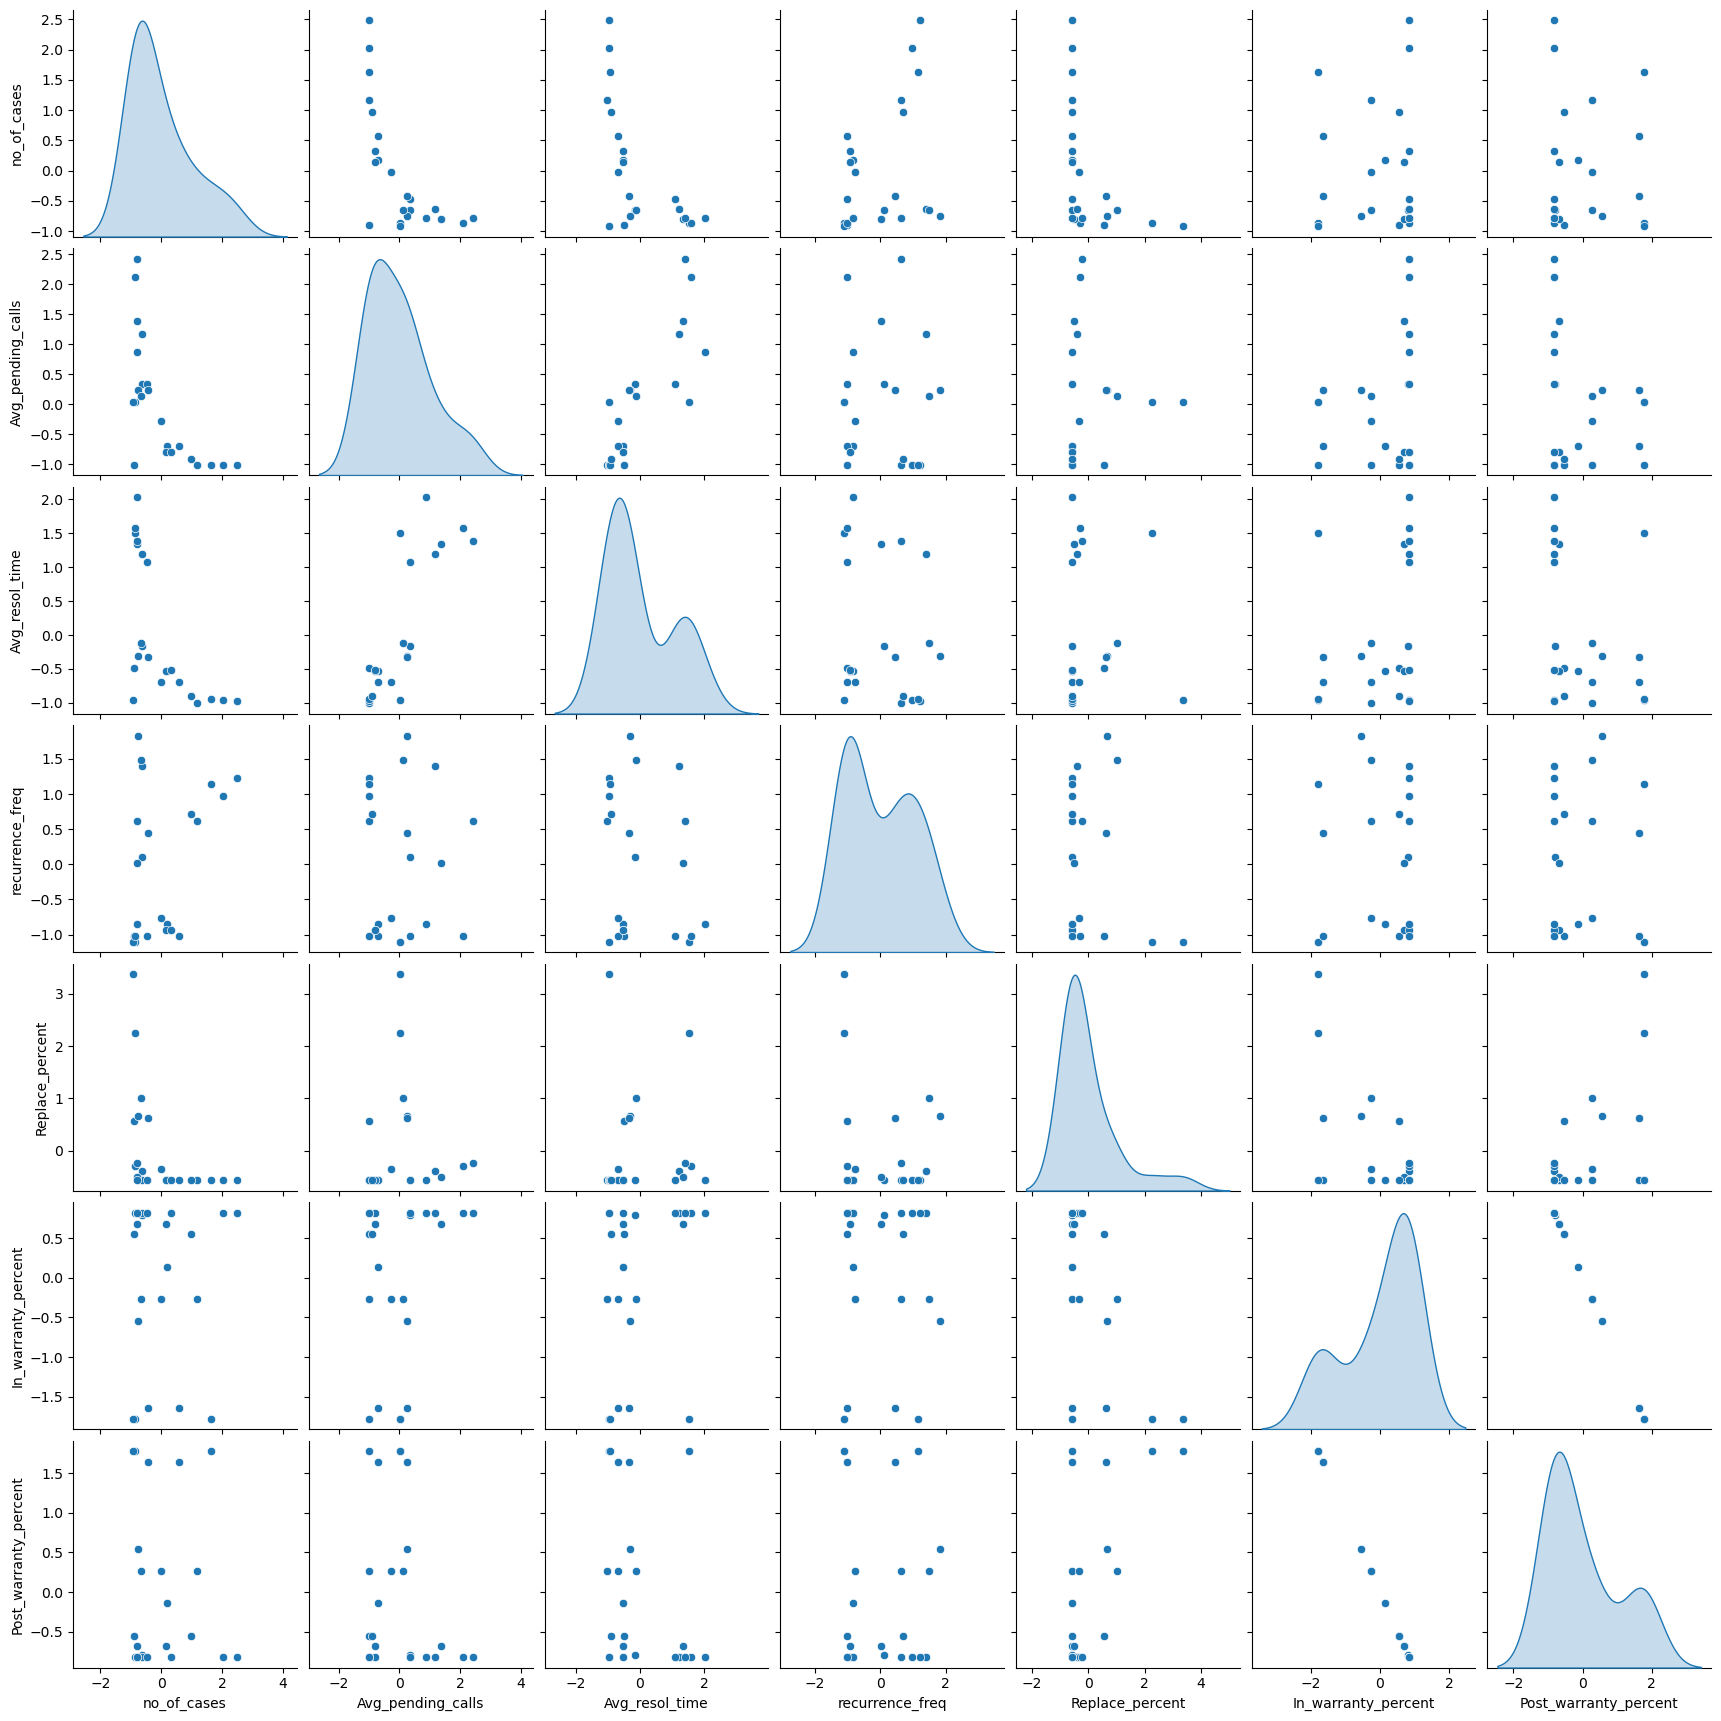

In [7]:
sns.pairplot(scaled,diag_kind='kde')

In [8]:
from scipy.spatial.distance import cdist
clusters= range(1,10)
meanDistor=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    
    model.fit(scaled)
    predict=model.predict(scaled)
    meanDistor.append(sum(np.min(cdist(scaled,model.cluster_centers_,'euclidean'),axis=1)/scaled.shape[0]))

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

In [9]:
meanDistor

[2.513218621572043,
 2.011069807948648,
 1.6368266300358518,
 1.4632577627349272,
 1.2192790203130381,
 1.0620842732423292,
 0.981504063787122,
 0.8636657490946982,
 0.7580018332708839]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Selecting k with the elbow method')

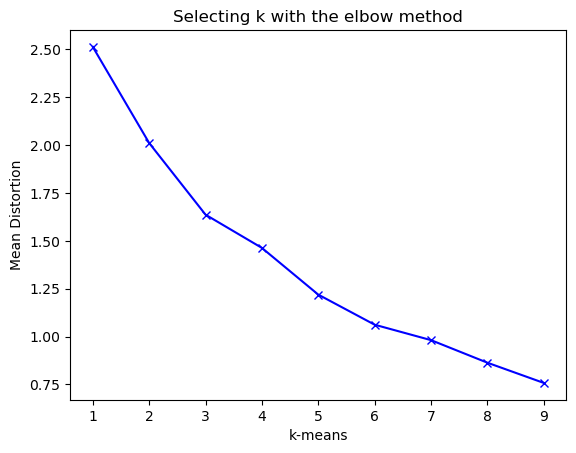

In [10]:
plt.plot(clusters,meanDistor,'bx-')
plt.xlabel('k-means')
plt.ylabel('Mean Distortion')
plt.title('Selecting k with the elbow method')

In [11]:
f_model=KMeans(3)
f_model.fit(scaled)
predict=f_model.predict(scaled)

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
data["Clusters"] = predict
data.head(23)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,1
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,1
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,1


In [13]:
data[data['Clusters']==0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,0
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,0
14,Remote Keys get stuck,450,1.0,8,0.25,0.00,100,0,0
15,Unable to operate menu from remote,520,1.0,7,0.28,0.00,100,0,0
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,0
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10,0


In [14]:
f_model=KMeans(5)
f_model.fit(scaled)
predict=f_model.predict(scaled)

<IPython.core.display.Javascript object>

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
data["Clusters"] = predict
data.head(23)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,4
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,2
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,3
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,3
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,2
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,3


In [16]:
data[data['Clusters']==2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,2
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,2
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,2
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,2
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,2
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,2


In [17]:
#Hierchical Clustering

In [18]:
df=pd.read_csv('Datasettt.csv')
df.head(10)

<IPython.core.display.Javascript object>

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,25.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [42]:
df_attr=df.iloc[:,1:7]
df_attr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017
4,817.714335,1.000000,16.00,16.00,0.0,0.000000


In [43]:
df_attr_scaled=df_attr.apply(zscore)
df_attr_scaled.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786


<IPython.core.display.Javascript object>

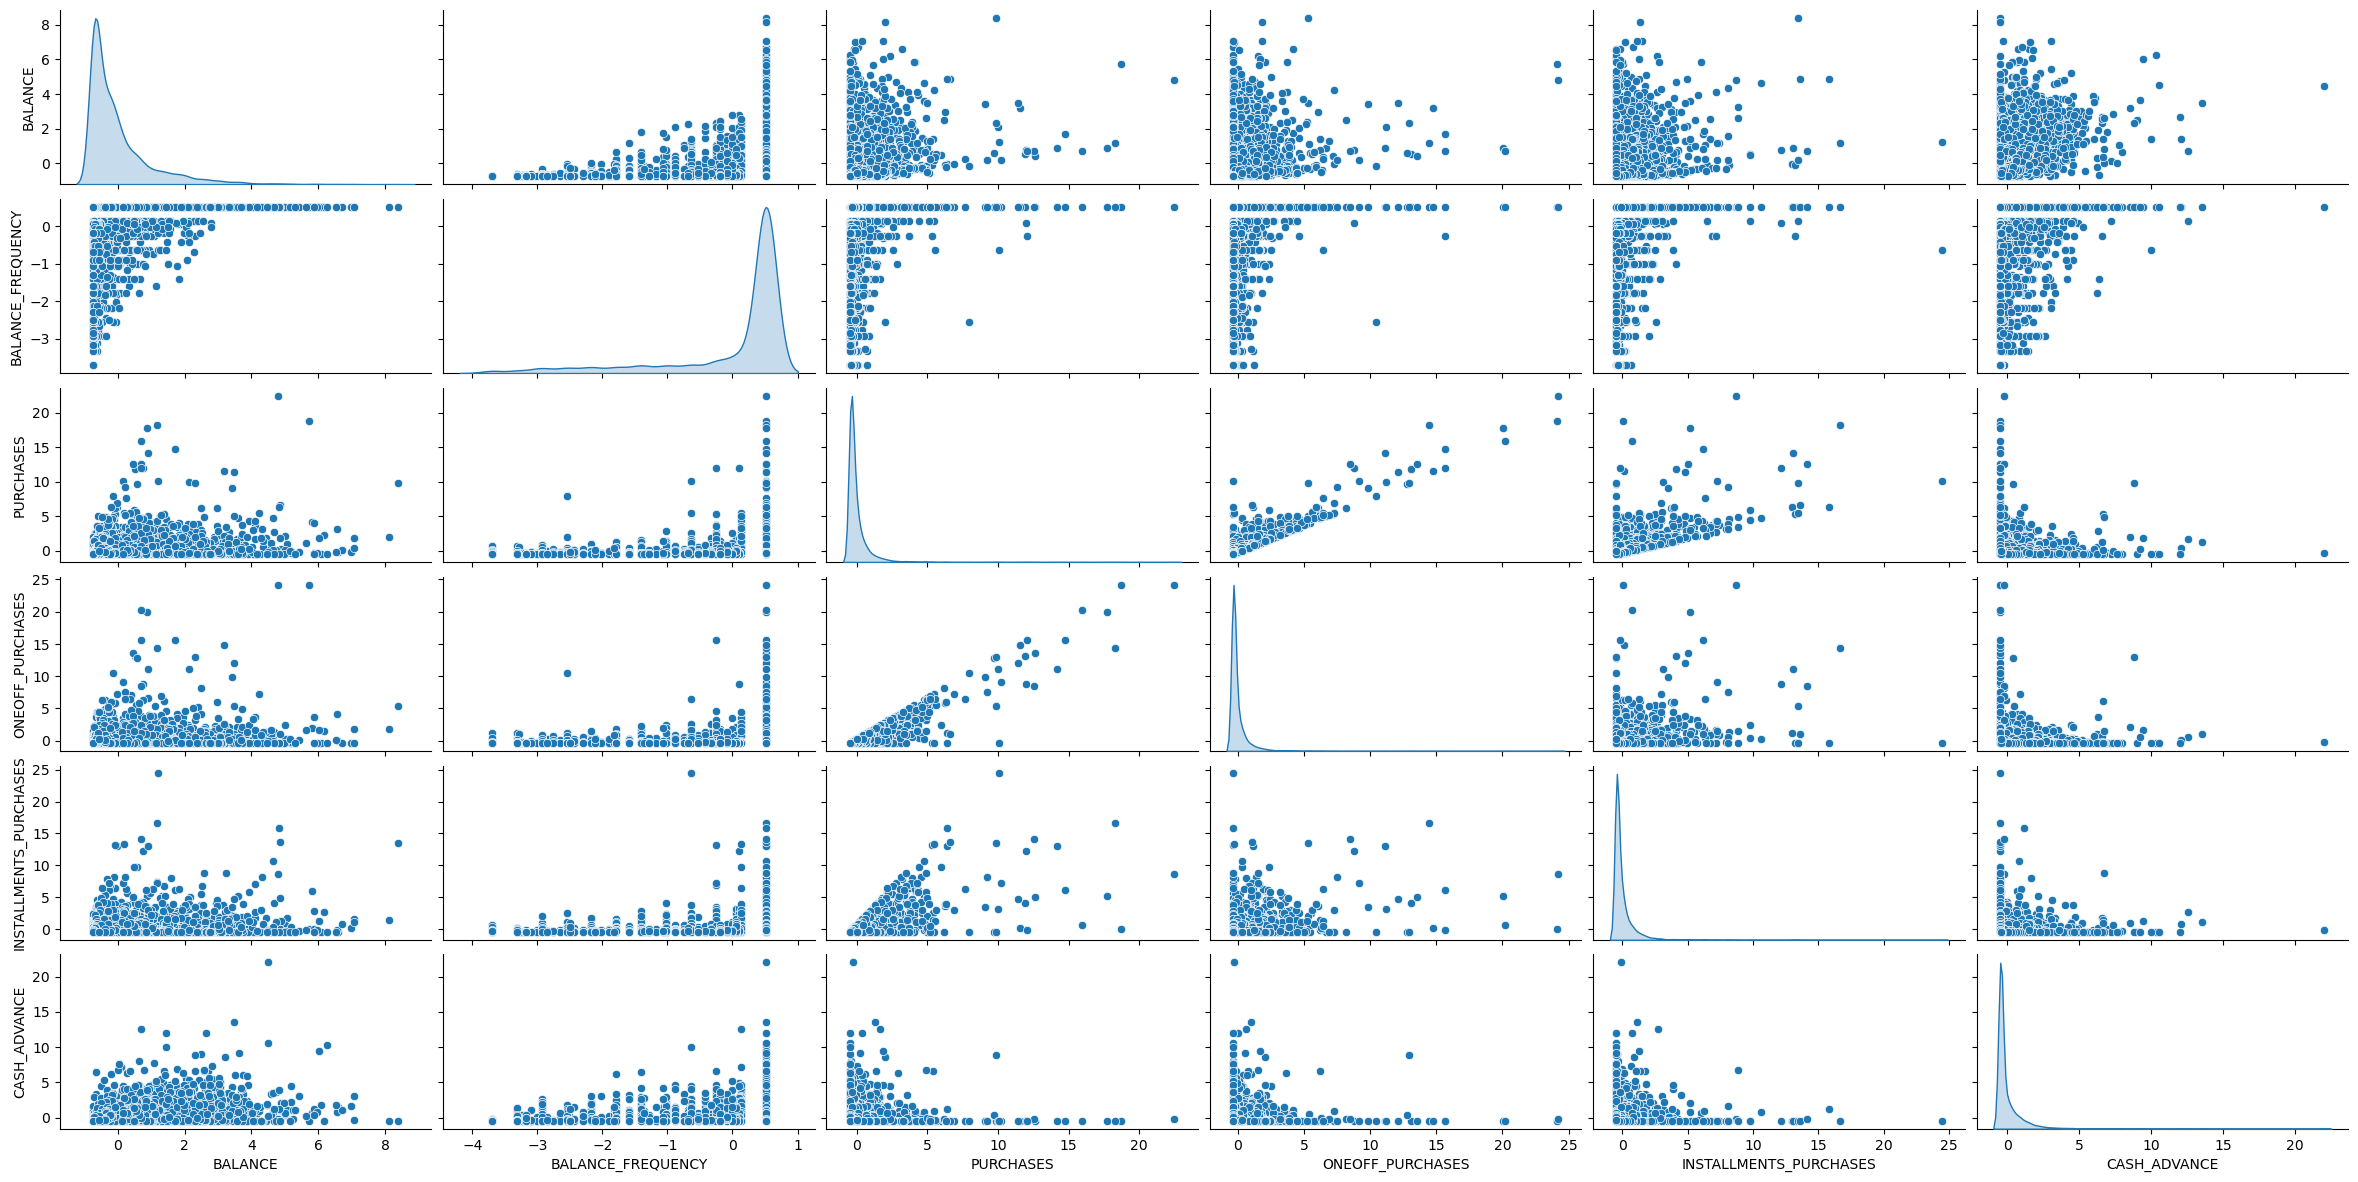

In [44]:
sns.pairplot(df_attr_scaled,height=2,aspect=2,diag_kind='kde')

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [47]:
model.fit(df_attr_scaled)

C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [49]:
df_attr['labels']=model.labels_
df_attr.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0
